# Python Review

This notebook contains mostly review material concerning importing ccd data, plotting, and array operations.  Most of this material you went over in lab 1.  If you are comfortable doing these things, you can skip reading this notebook.

In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0)) # This line changes the default figure size to be 12x9

In [2]:
# Reading in the raw data:
myimage = fits.getdata("example.fit").astype(int)
# note the '.astype(int)' at the end
# fits.getdata("filename") imports data from a .fit file into an array.
# The .astype(datatype) method transforms the values in the array to the specified datatype (in this case, integers)

# As you can see, it is a 2D Array of numbers (since it is large, `print` is only showing a sample)
print(myimage)

[[483 458 477 ..., 430 460 488]
 [471 465 463 ..., 463 483 463]
 [490 448 486 ..., 438 483 497]
 ..., 
 [188 213 208 ..., 578 562 552]
 [194 202 219 ..., 562 558 549]
 [212 187 211 ..., 506 546 516]]


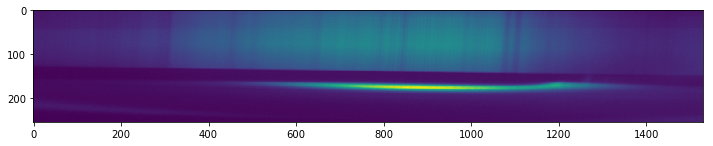

In [3]:
# View an image of the array:
plt.imshow(myimage) #imshow plots a 2x2 array of numbers into a plane where color represents the value of each array element
plt.show()

In [4]:
# View the dimensions of the array:
myimage.shape 

(255, 1530)

Note that in Python, the first index is the height (y coordinate/row number) and the second index is the width (x coordinate/column number). If we want to make a sub array, we can use colon notation.  When you see something in the form `[w:z]`, it means keep elements starting at index `w` and go all the way to index `z-1`.  If you see `[w:]` it means start at index `w` and go to the end.  Likewise, `[:z]` means go from the beginning to index `z`, and `[:]` means keep everything.

You can also reverse an axis with `[::-1]`

(So all in one step, if you want, you can take a splice between indices w and z-1 and reverse the axis with `[w:z:-1]`)

Let's make an image of a horizontal strip of the data (say between rows 150 and 200 - ***note this is just an example, don't use these numbers in your lab.  These are not the spectra you are looking for!  These are stray light regions. I just picked them to illustrate array reversal in one axis***).

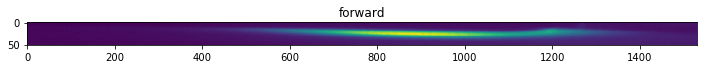

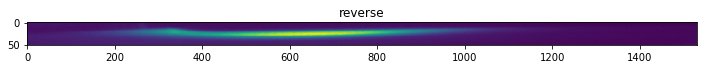

In [5]:
mysubimage = myimage[150:201, :]
myreversesubimage = mysubimage[:,::-1]
# or, identically: myreversesubimage = myimage[150:201,::-1]

#Recall that for an index [i:j:k], you will get the elements i up to but not including j, in steps of k.
#A negative step goes in reverse (thus, if you do this for the whole array, [::-1], you get the array back backwards)


plt.imshow(mysubimage)
plt.title("forward")
plt.show()

plt.imshow(myreversesubimage)
plt.title("reverse")
plt.show()

Likewise, you can make a vector, let's say for example using the 25th row of `myreversesubimage`

In [6]:
myvector = myreversesubimage[25, :]
print(myvector)

[540 519 549 ..., 315 312 314]


You can add two vectors together quite simpy:

In [7]:
myvec25 = myreversesubimage[25, :]
myvec26 = myreversesubimage[26, :]
myaddedvec = myvec25 + myvec26
print(myaddedvec)

[1127 1073 1132 ...,  625  616  638]


And then you can plot this vector.

Note that we are creating a second vector, `colnum`, that holds the column number (x axis).  You will need to manipulate the `colnum` vector with stretch/shift values to convert pixels to nanometers in your report.

You may also find the function `plt.axvline` useful for alignment of your spectral features

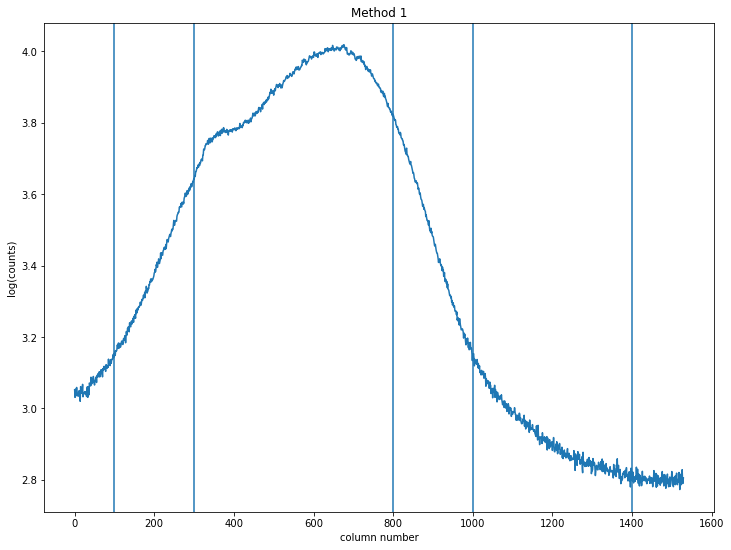

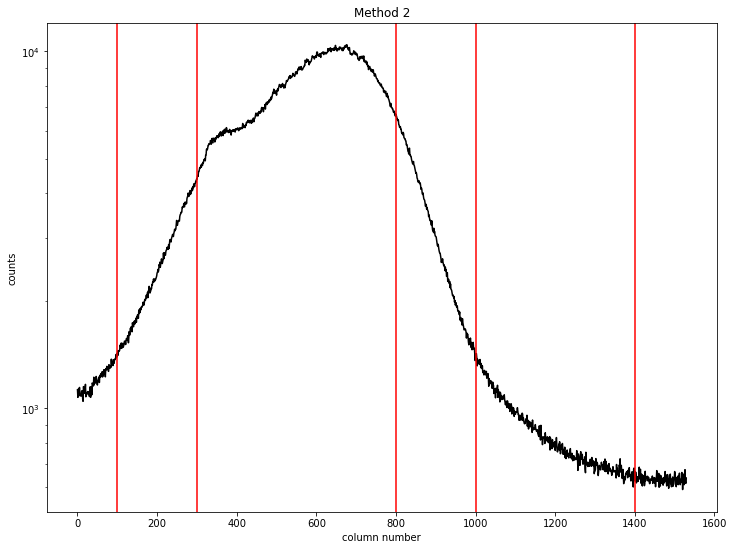

In [8]:
numberofcols = len(myaddedvec)
colnum = np.arange(numberofcols)

vertcols = [100, 300, 800, 1000, 1400] # Note, I just picked these for demo purposes

# You can plot things logarithmically in a couple of ways:
plt.plot(colnum, np.log10(myaddedvec))
plt.title("Method 1")
plt.xlabel('column number')
plt.ylabel('log(counts)')
for col in vertcols:
    # So `col` is 100 the first time in the loop, 300 the second time, 800 the third time, etc.
    plt.axvline(col) #plt.axvline(value) plots a vertical line at the x-position of value. You can still apply colors, linestyles, etc to axvline just like a normal plt.plot line.
plt.show()

# or
plt.plot(colnum, myaddedvec, color='k')
plt.title("Method 2")
plt.xlabel('column number')
plt.ylabel('counts')
plt.yscale('log')
for col in vertcols:
    plt.axvline(col, color='r')
plt.show()